### Super Resolutions Gans

TensorFlow Implementation of "Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial Network"

# Training

### Pre-trained models

If you want to skip training and directly run the demo below, download [weights-srgan.tar.gz](https://drive.google.com/open?id=1u9ituA3ScttN9Vi-UkALmpO0dWQLm8Rv) and extract the archive in the project's root directory. This will create a folder `weights/srgan` containing the weights of the pre-trained models.

### Generator pre-training

## Demo

In [10]:
import os
import matplotlib.pyplot as plt


from data import DIV2K
from model.srgan import generator, discriminator
from train import SrganTrainer, SrganGeneratorTrainer

%matplotlib inline

In [11]:
# Location of model weights (needed for demo)
weights_dir = 'weights/srgan'
weights_file = lambda filename: os.path.join(weights_dir, filename)

os.makedirs(weights_dir, exist_ok=True)

## Datasets

You don't need to download the DIV2K dataset as the required parts are automatically downloaded by the `DIV2K` class. By default, DIV2K images are stored in folder `.div2k` in the project's root directory.

In [12]:
pre_generator = generator()
gan_generator = generator()

pre_generator.load_weights(weights_file('pre_generator.h5'))
gan_generator.load_weights(weights_file('gan_generator.h5'))

In [21]:
from model import resolve_single
from utils import load_image

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    
    pre_sr = resolve_single(pre_generator, lr)
    gan_sr = resolve_single(gan_generator, lr)
    
    images = [lr, pre_sr, gan_sr]
    titles = ['LR', 'SR (PRE)', 'SR (GAN)']
    positions = [1, 3, 4]
    
    plt.axis('off')
    plt.imshow(gan_sr)
    image_name = 'out' + '.png'
    
    plt.savefig(image_name, transparent=True, bbox_inches='tight', pad_inches=0)

Output Generated


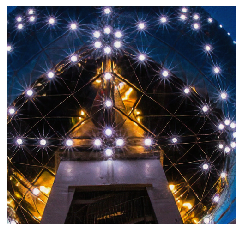

In [22]:
resolve_and_plot('demo/input_1.png')
print("Output Generated")

In [15]:
"""
resolve_and_plot('demo/0829x4-crop.png')
#     for i, (img, title, pos) in enumerate(zip(images, titles, positions)):
#     plt.subplot(2, 2, pos)
#     plt.axis('off')
plt.figure(figsize=(20, 20))
for i, (img, title, pos) in enumerate(zip(images, titles, positions)):
        plt.subplot(2, 2, pos)
        plt.imsave('out.png',img)
        plt.figure(figsize=(20, 20))
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
        
"""

"\nresolve_and_plot('demo/0829x4-crop.png')\n#     for i, (img, title, pos) in enumerate(zip(images, titles, positions)):\n#     plt.subplot(2, 2, pos)\n#     plt.axis('off')\nplt.figure(figsize=(20, 20))\nfor i, (img, title, pos) in enumerate(zip(images, titles, positions)):\n        plt.subplot(2, 2, pos)\n        plt.imsave('out.png',img)\n        plt.figure(figsize=(20, 20))\n        plt.imshow(img)\n        plt.title(title)\n        plt.xticks([])\n        plt.yticks([])\n        \n"